**Q1)**
**Performed 4 different experiments for 1 D convolution problem. **

**Experiment-1:**

Network  Parameters:

   learning_rate = 0.0001 , batch_size = 128 , n_samples = 2459 , training_epochs = 50, dropout prob=0.3
       
Connv-layer-1=== > 
   Filter=256, strides=1, pool_size=2, pool stride=2, kernel = 16, activation = RELU

Connv-layer-2=== > 
   Filter=512, strides=1, pool_size=2, pool stride=2, kernel = 8, activation = RELU


**Experiment-2:**

Connv-layer-1=== > 
   Filter=52 strides=1, pool_size=5 pool stride=2, kernel = 3, activation = RELU

Connv-layer-2=== > 
   Filter=36 strides=1, pool_size=5, pool stride=2, kernel = 3 activation = RELU


**Experiment-3:**

Network  Parameters:
   learning_rate = 0.0002, batch_size = 128 , n_samples = 2459 , training_epochs = 1000, dropout prob=0.3

Connv-layer-1=== > 
   Filter=16, strides=1, pool_size=5 pool stride=2, kernel = 16, activation = RELU

Connv-layer-2=== > 
   Filter=32 , strides=1, pool_size=5, pool stride=2, kernel = 8 , activation = RELU

FC Layer-3=== >
   Num of neurons= 2048 , Weight initializer = he_normal , tivation = RELU

FC Layer-4=== >
   Num of neurons= 513 , Weight initializer = he_normal , tivation = RELU


**Experiment-4: **

Network  Parameters:
   learning_rate = 0.0002, batch_size = 128 , n_samples = 2459 , training_epochs = 1000, dropout prob=0.3

Connv-layer-1=== > 
   Filter=16, strides=1, pool_size=5 pool stride=2, kernel = 16, activation = RELU

Connv-layer-2=== > 
   Filter=32 , strides=1, pool_size=5, pool stride=2, kernel = 8 , activation = RELU

FC Layer-3=== >
   Num of neurons= 2048 , Weight initializer = he_normal , tivation = RELU

In [3]:
!pip install librosa

In [0]:
import tensorflow as tf

tf.reset_default_graph()

In [0]:
import librosa


In [55]:
from google.colab import files

uploaded = files.upload()

Saving test_x_01.wav to test_x_01 (1).wav
Saving test_x_02.wav to test_x_02 (1).wav
Saving train_clean_male.wav to train_clean_male (1).wav
Saving train_dirty_male.wav to train_dirty_male (1).wav


In [3]:
!ls

 ass2_test_s_01_recons_exp2.wav   test_x_02.wav
 sample_data			 'train_clean_male (1).wav'
'test_x_01 (1).wav'		  train_clean_male.wav
 test_x_01.wav			 'train_dirty_male (1).wav'
'test_x_02 (1).wav'		  train_dirty_male.wav


In [0]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [8]:
print("S:", S.shape)
print("X:", X.shape)

S: (513, 2459)
X: (513, 2459)


In [0]:
import numpy as np
S_mod = np.absolute(S)
X_mod = np.absolute(X)

In [0]:
S_mod_transpose = S_mod.T
X_mod_transpose = X_mod.T

In [21]:
print(S_mod_transpose.shape)
print(X_mod_transpose.shape)

(2459, 513)
(2459, 513)


In [0]:
import tensorflow as tf

# Input placeholder 
x = tf.placeholder('float',[None, 513])

# Output placeholder
y = tf.placeholder('float',[None, 513])

**Input for 1D Experiments**

In [0]:
# Reshape Input  <batch size, width, channel>

# 513 is the width of the input 
# 1 is the number of channel
# -1 is for batch size, which means that this dimension should be dynamically computed keeping the other dimension costant

x_input = tf.reshape(x,[-1,513,1]) 

**Experiment-1 for 1 D Convolution**


In [32]:
# 1 D Convolution

# Convolution layer 1
conv_layer_1 = tf.layers.conv1d(inputs=x_input, filters=256, kernel_size=16, strides=1,padding='same', activation = tf.nn.relu)
print("conv_layer_1 shape:", conv_layer_1.shape)

max_pool_1 = tf.layers.max_pooling1d(inputs=conv_layer_1, pool_size=2, strides=2, padding='same')
print("max_pool_1 shape:", max_pool_1.shape)

# Convolution layer 2
conv_layer_2 = tf.layers.conv1d(inputs=max_pool_1, filters=512, kernel_size=8, strides=1,padding='same', activation = tf.nn.relu)
print("conv_layer_2 shape:", conv_layer_2.shape)

max_pool_2 = tf.layers.max_pooling1d(inputs=conv_layer_2, pool_size=2, strides=2, padding='same')
print("max_pool_2 shape:", max_pool_2.shape)

Instructions for updating:
Use keras.layers.conv1d instead.
conv_layer_1 shape: (?, 513, 256)
Instructions for updating:
Use keras.layers.max_pooling1d instead.
max_pool_1 shape: (?, 257, 256)
conv_layer_2 shape: (?, 257, 512)
max_pool_2 shape: (?, 129, 512)


In [0]:
# Fully Connected Final Layer 

convo_2_flat = tf.reshape(max_pool_2,[-1,129*512])  
#convo_2_flat =  tf.layers.flatten(max_pool_2)

In [0]:
# Dropout Probability variable

hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(convo_2_flat,keep_prob=hold_prob)

In [0]:
# Predictions <final dense layer, number of output classes>

pred = tf.layers.dense(full_one_dropout, 513)

In [0]:
# Network Parameters

learning_rate = 0.0001
batch_size = 128
n_samples = 2459
training_epochs = 50

In [0]:
# Cost
loss = tf.losses.mean_squared_error(y, pred)


# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost is 0.0696 
Epoch: 2 cost is 0.0618 
Epoch: 3 cost is 0.0549 
Epoch: 4 cost is 0.0438 
Epoch: 5 cost is 0.0396 
Epoch: 6 cost is 0.0294 
Epoch: 7 cost is 0.0295 
Epoch: 8 cost is 0.0281 
Epoch: 9 cost is 0.0262 
Epoch: 10 cost is 0.0239 
Epoch: 11 cost is 0.0205 
Epoch: 12 cost is 0.0212 
Epoch: 13 cost is 0.0210 
Epoch: 14 cost is 0.0184 
Epoch: 15 cost is 0.0162 
Epoch: 16 cost is 0.0159 
Epoch: 17 cost is 0.0151 
Epoch: 18 cost is 0.0146 
Epoch: 19 cost is 0.0139 
Epoch: 20 cost is 0.0146 
Epoch: 21 cost is 0.0123 
Epoch: 22 cost is 0.0128 
Epoch: 23 cost is 0.0121 
Epoch: 24 cost is 0.0126 
Epoch: 25 cost is 0.0123 
Epoch: 26 cost is 0.0110 
Epoch: 27 cost is 0.0113 
Epoch: 28 cost is 0.0117 
Epoch: 29 cost is 0.0105 
Epoch: 30 cost is 0.0108 
Epoch: 31 cost is 0.0101 
Epoch: 32 cost is 0.0105 
Epoch: 33 cost is 0.0102 
Epoch: 34 cost is 0.0095 
Epoch: 35 cost is 0.0098 
Epoch: 36 cost is 0.0093 
Epoch: 37 cost is 0.0094 
Epoch: 38 cost is 0.0092 
Epoch: 39 cost is 0.0

Text(0, 0.5, 'loss')

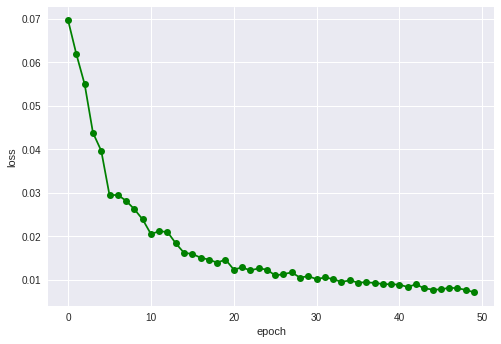

In [38]:
# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y,hold_prob:0.3})
    
    avg_cost += c/total_batch
    
  print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
print("\nModel has completed {} epochs of training".format(training_epochs))
    
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

**Experiment-2 for 1 D Convolution start**

In [39]:
# Test 1 D network with different layer structure

x_input = tf.reshape(x,[-1,513,1]) 

# Convolution layer 1
conv_layer_1 = tf.layers.conv1d(inputs=x_input, filters=52, kernel_size=3, strides=1,padding='same',data_format="channels_last",kernel_initializer=tf.keras.initializers.he_normal(seed=None), activation = tf.nn.relu)
print("conv_layer_1 shape:", conv_layer_1.shape)


max_pool_1 = tf.layers.max_pooling1d(inputs=conv_layer_1, pool_size=5, strides=2, padding='same')
print("max_pool_1 shape:", max_pool_1.shape)


# Convolution layer 2
conv_layer_2 = tf.layers.conv1d(inputs=max_pool_1, filters=36, kernel_size=3, strides=1,padding='same', data_format="channels_last",kernel_initializer=tf.keras.initializers.he_normal(seed=None),activation = tf.nn.relu)
print("conv_layer_2 shape:", conv_layer_2.shape)


max_pool_2 = tf.layers.max_pooling1d(inputs=conv_layer_2, pool_size=5, strides=2, padding='same')
print("max_pool_2 shape:", max_pool_2.shape)


convo_2_flat = tf.reshape(max_pool_2,[-1,129*36])  





conv_layer_1 shape: (?, 513, 52)
max_pool_1 shape: (?, 257, 52)
conv_layer_2 shape: (?, 257, 36)
max_pool_2 shape: (?, 129, 36)


In [0]:
# Fully Connected Final Layer 1

W1 = tf.get_variable('FC4',shape=(129*36,1024),initializer=tf.keras.initializers.he_normal(seed=None))
FC1 = tf.nn.relu(tf.matmul(convo_2_flat,W1))

# Fully Connected Final Layer 2

W2 = tf.get_variable('FC3',shape=(1024,513),initializer=tf.keras.initializers.he_normal(seed=None))
FC2 = tf.nn.relu(tf.matmul(FC1,W2))


In [0]:
# Dropout Probability variable

hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(FC2,keep_prob=hold_prob)

In [0]:
# Predictions <final dense layer, number of output classes>

pred = tf.layers.dense(full_one_dropout, 513)

In [0]:
# Network Parameters

learning_rate = 0.0001
batch_size = 128
n_samples = 2459
training_epochs = 50

In [0]:
# Cost
loss = tf.losses.mean_squared_error(y, pred)


# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost is 0.5683 
Epoch: 2 cost is 0.1066 
Epoch: 3 cost is 0.0987 
Epoch: 4 cost is 0.0993 
Epoch: 5 cost is 0.0978 
Epoch: 6 cost is 0.1130 
Epoch: 7 cost is 0.0843 
Epoch: 8 cost is 0.0970 
Epoch: 9 cost is 0.0825 
Epoch: 10 cost is 0.1039 
Epoch: 11 cost is 0.0905 
Epoch: 12 cost is 0.0898 
Epoch: 13 cost is 0.0962 
Epoch: 14 cost is 0.0949 
Epoch: 15 cost is 0.0989 
Epoch: 16 cost is 0.0861 
Epoch: 17 cost is 0.0908 
Epoch: 18 cost is 0.0911 
Epoch: 19 cost is 0.0870 
Epoch: 20 cost is 0.1035 
Epoch: 21 cost is 0.0893 
Epoch: 22 cost is 0.0862 
Epoch: 23 cost is 0.0900 
Epoch: 24 cost is 0.0827 
Epoch: 25 cost is 0.0855 
Epoch: 26 cost is 0.0840 
Epoch: 27 cost is 0.0860 
Epoch: 28 cost is 0.0852 
Epoch: 29 cost is 0.0854 
Epoch: 30 cost is 0.0866 
Epoch: 31 cost is 0.0769 
Epoch: 32 cost is 0.0789 
Epoch: 33 cost is 0.0695 
Epoch: 34 cost is 0.0802 
Epoch: 35 cost is 0.0805 
Epoch: 36 cost is 0.0809 
Epoch: 37 cost is 0.0768 
Epoch: 38 cost is 0.0837 
Epoch: 39 cost is 0.0

Text(0, 0.5, 'loss')

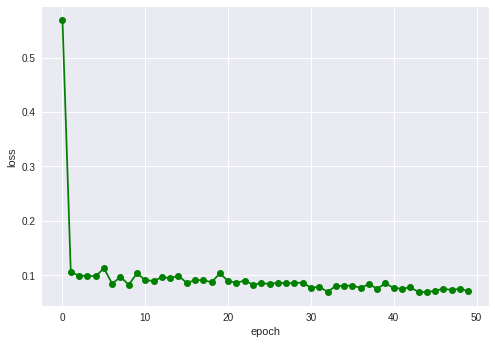

In [45]:
# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# 15 loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y,hold_prob:0.3})
    
    avg_cost += c/total_batch
    
  print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
print("\nModel has completed {} epochs of training".format(training_epochs))
                       

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [49]:
# Testing the test file with Experiment-2 trained model

x_test, sr_test=librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)
X_test_mod = np.absolute(X_test)
X_test_mod_transpose = X_test_mod.T
X_hat_test = sess.run(pred, feed_dict={x: X_test_mod_transpose,hold_prob:1.0})
X_hat_intermediate = (X_test/X_test_mod)
X_hat = np.multiply(X_hat_intermediate,X_hat_test.T)
X_hat_recon = librosa.istft(X_hat,  hop_length=512, win_length=1024) 
librosa.output.write_wav('ass2_test_s_01_recons_exp2.wav', X_hat_recon, sr_test)

# snr start 
num = np.sum(X_test.astype(float))** 2
print(num)

den = np.sum(np.subtract(x_test.astype(float)[:72192] , X_hat_recon.astype(float)) ** 2)
print(den)

snr = num/den

import math 
print(10 * math.log10((snr)))

# output file download

from google.colab import files

with open('ass2_test_s_01_recons_exp2.wav', 'w') as f:
  f.write('ass2_test_s_01_recons_exp2.wav')

files.download('ass2_test_s_01_recons_exp2.wav')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


0.6199765115364817
38.638231037992234
-17.94641998924812


In [48]:
x_test.astype(float)[:72192]

(72192,)

**Experiment-2 for 1 D Convolution end**

**Experiment-3 for 1 D Convolution start**

In [50]:
# Test 1 D network with different layer structure

x_input = tf.reshape(x,[-1,513,1]) 

# Convolution layer 1
conv_layer_1 = tf.layers.conv1d(inputs=x_input, filters=16, kernel_size=16, strides=1,padding='same',data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None), activation = tf.nn.relu)
print("conv_layer_1 shape:", conv_layer_1.shape)


max_pool_1 = tf.layers.max_pooling1d(inputs=conv_layer_1, pool_size=5, strides=2, padding='same')
print("max_pool_1 shape:", max_pool_1.shape)


# Convolution layer 2
conv_layer_2 = tf.layers.conv1d(inputs=max_pool_1, filters=32, kernel_size=8, strides=1,padding='same', data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None),activation = tf.nn.relu)
print("conv_layer_2 shape:", conv_layer_2.shape)


max_pool_2 = tf.layers.max_pooling1d(inputs=conv_layer_2, pool_size=5, strides=2, padding='same')
print("max_pool_2 shape:", max_pool_2.shape)



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

conv_layer_1 shape: (?, 513, 16)
max_pool_1 shape: (?, 257, 16)
conv_layer_2 shape: (?, 257, 32)
max_pool_2 shape: (?, 129, 32)


In [0]:
convo_2_flat = tf.reshape(max_pool_2,[-1,129*32])  

In [0]:
# Fully Connected Final Layer 1

W1 = tf.get_variable('F1',shape=(129*32,2048),initializer=tf.keras.initializers.he_normal(seed=None))
FC1 = tf.nn.relu(tf.matmul(convo_2_flat,W1))

# Fully Connected Final Layer 2

W2 = tf.get_variable('F2',shape=(2048,513),initializer=tf.keras.initializers.he_normal(seed=None))
FC2 = tf.nn.relu(tf.matmul(FC1,W2))

In [0]:
# Dropout Probability variable

hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(FC2,keep_prob=hold_prob)

In [0]:
# Predictions <final dense layer, number of output classes>

pred = tf.layers.dense(full_one_dropout, 513)

In [0]:
# Network Parameters

learning_rate = 0.0002
batch_size = 128
n_samples = 2459
training_epochs = 1000

In [0]:
# Cost
loss = tf.losses.mean_squared_error(y, pred)

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '



Model has completed 1000 epochs of training


Text(0, 0.5, 'loss')

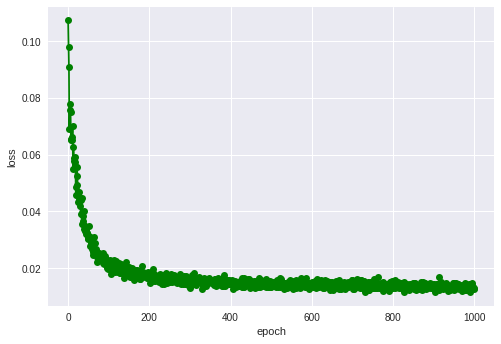

In [57]:
# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# 15 loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y,hold_prob:0.3})
    
    avg_cost += c/total_batch
    
  #print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
print("\nModel has completed {} epochs of training".format(training_epochs))
                       

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [58]:
# Testing the test file with Experiment-2 trained model

x_test, sr_test=librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)
X_test_mod = np.absolute(X_test)
X_test_mod_transpose = X_test_mod.T
X_hat_test = sess.run(pred, feed_dict={x: X_test_mod_transpose,hold_prob:1.0})
X_hat_intermediate = (X_test/X_test_mod)
X_hat = np.multiply(X_hat_intermediate,X_hat_test.T)
X_hat_recon = librosa.istft(X_hat,  hop_length=512, win_length=1024) 
librosa.output.write_wav('ass2_test_s_01_recons_exp2.wav', X_hat_recon, sr_test)

# snr start 
num = np.sum(X_test.astype(float))** 2
print(num)

den = np.sum(np.subtract(x_test.astype(float)[:72192] , X_hat_recon.astype(float)) ** 2)
print(den)

snr = num/den

import math 
print(10 * math.log10((snr)))

# output file download

from google.colab import files

with open('ass2_test_s_01_recons_exp2.wav', 'w') as f:
  f.write('ass2_test_s_01_recons_exp2.wav')

files.download('ass2_test_s_01_recons_exp2.wav')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


0.6199765115364817
24.385061206138243
-15.94748613895806


**Experiment-4 for 1 D Convolution start**

In [72]:
# Test 1 D network with different layer structure

import time
start_time = time.time()


x_input = tf.reshape(x,[-1,513,1]) 

# Convolution layer 1
conv_layer_1 = tf.layers.conv1d(inputs=x_input, filters=16, kernel_size=16, strides=1,padding='same',data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None), activation = tf.nn.relu)
print("conv_layer_1 shape:", conv_layer_1.shape)


max_pool_1 = tf.layers.max_pooling1d(inputs=conv_layer_1, pool_size=2, strides=2, padding='same')
print("max_pool_1 shape:", max_pool_1.shape)


# Convolution layer 2
conv_layer_2 = tf.layers.conv1d(inputs=max_pool_1, filters=32, kernel_size=8, strides=1,padding='same', data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None),activation = tf.nn.relu)
print("conv_layer_2 shape:", conv_layer_2.shape)


max_pool_2 = tf.layers.max_pooling1d(inputs=conv_layer_2, pool_size=2, strides=2, padding='same')
print("max_pool_2 shape:", max_pool_2.shape)


conv_layer_1 shape: (?, 513, 16)
max_pool_1 shape: (?, 257, 16)
conv_layer_2 shape: (?, 257, 32)
max_pool_2 shape: (?, 129, 32)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '



Model has completed 500 epochs of training
--- 2380.456753730774 seconds ---


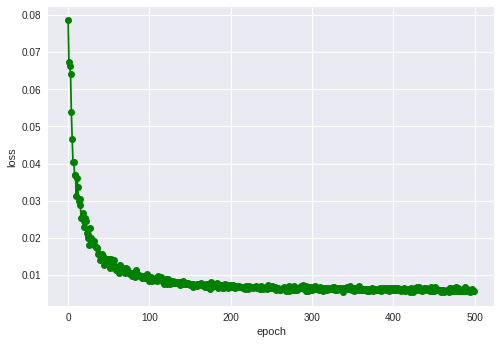

In [73]:

convo_2_flat = tf.reshape(max_pool_2,[-1,129*32]) 

# Fully Connected Final Layer 1

W1 = tf.get_variable('F1',shape=(129*32,2048),initializer=tf.keras.initializers.he_normal(seed=None))
FC1 = tf.nn.relu(tf.matmul(convo_2_flat,W1))

# Dropout Probability variable

hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(FC1,keep_prob=hold_prob)

# Predictions <final dense layer, number of output classes>

pred = tf.layers.dense(full_one_dropout, 513)

# Network Parameters

learning_rate = 0.0002
batch_size = 128
n_samples = 2459
training_epochs = 500

# Cost
loss = tf.losses.mean_squared_error(y, pred)

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# 15 loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y,hold_prob:0.3})
    
    avg_cost += c/total_batch
    
  #print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
print("\nModel has completed {} epochs of training".format(training_epochs))
                       

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
# Testing the test file with Experiment-2 trained model

x_test, sr_test=librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)
X_test_mod = np.absolute(X_test)
X_test_mod_transpose = X_test_mod.T
X_hat_test = sess.run(pred, feed_dict={x: X_test_mod_transpose,hold_prob:1.0})
X_hat_intermediate = (X_test/X_test_mod)
X_hat = np.multiply(X_hat_intermediate,X_hat_test.T)
X_hat_recon = librosa.istft(X_hat,  hop_length=512, win_length=1024) 
librosa.output.write_wav('ass2_test_s_01_recons_exp2.wav', X_hat_recon, sr_test)

# snr start 
num = np.sum(X_test.astype(float))** 2
print(num)

den = np.sum(np.subtract(x_test.astype(float)[:72192] , X_hat_recon.astype(float)) ** 2)
print(den)

snr = num/den

import math 
print(10 * math.log10((snr)))

In [1]:
x_test.shape

NameError: ignored

In [0]:
X_hat_recon.shape

In [0]:

# output file download

from google.colab import files

with open('ass2_test_s_02_recons_exp2.wav', 'w') as f:
  f.write('ass2_test_s_02_recons_exp2.wav')

files.download('ass2_test_s_02_recons_exp2.wav')

**Experiment-4 for 1 D Convolution end**

**Experiment-5 for 1 D Convolution Start **


In [0]:
import tensorflow as tf

# Input placeholder 
x = tf.placeholder('float',[None, 513])

# Output placeholder
y = tf.placeholder('float',[None, 513])


x_input = tf.reshape(x,[-1,1,513,1]) 

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [15]:
convo_1 = convolutional_layer(x_input,shape=[4,4,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)



Instructions for updating:
Colocations handled automatically by placer.


In [16]:
print(convo_2_pooling.shape)

(?, 1, 129, 64)


In [0]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,1*129*64])

In [0]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [19]:
# Dropout Probability variable

hold_prob = tf.placeholder(tf.float32)

full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# Predictions <final dense layer, number of output classes>

pred = tf.layers.dense(full_one_dropout, 513)

Instructions for updating:
Use keras.layers.dense instead.


Instructions for updating:
Use tf.cast instead.

Model has completed 500 epochs of training


Text(0, 0.5, 'loss')

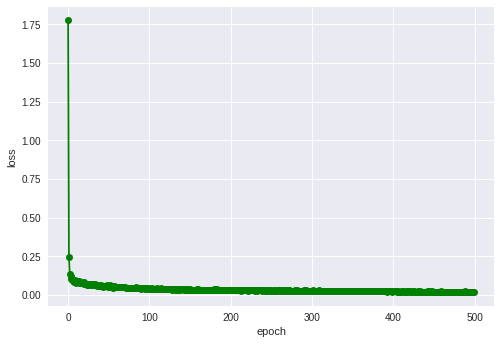

In [21]:
# Network Parameters

learning_rate = 0.0001
batch_size = 128
n_samples = 2459
training_epochs = 500

# Cost
loss = tf.losses.mean_squared_error(y, pred)


# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# 15 loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y,hold_prob:0.3})
    
    avg_cost += c/total_batch
    
  #print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
print("\nModel has completed {} epochs of training".format(training_epochs))
                       
    

index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [22]:
## Testing the test file with Experiment-2 trained model

x_test, sr_test=librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)
X_test_mod = np.absolute(X_test)
X_test_mod_transpose = X_test_mod.T
X_hat_test = sess.run(pred, feed_dict={x: X_test_mod_transpose,hold_prob:1.0})
X_hat_intermediate = (X_test/X_test_mod)
X_hat = np.multiply(X_hat_intermediate,X_hat_test.T)
X_hat_recon = librosa.istft(X_hat,  hop_length=512, win_length=1024) 
librosa.output.write_wav('ass2_test_s_01_recons_exp2.wav', X_hat_recon, sr_test)

# snr start 
num = np.sum(X_test.astype(float))** 2
print(num)

den = np.sum(np.subtract(x_test.astype(float)[:72192] , X_hat_recon.astype(float)) ** 2)
print(den)

snr = num/den

import math 
print(10 * math.log10((snr)))

# output file download

from google.colab import files

with open('ass2_test_s_01_recons_exp2.wav', 'w') as f:
  f.write('ass2_test_s_01_recons_exp2.wav')

files.download('ass2_test_s_01_recons_exp2.wav')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


0.6199765115364817
19.3243614062997
-14.937299150070764
